# SVD

## Parte 1:

Nella prima parte di questo programma sarà necessario, dopo aver caricato i dati in un dataframe di pandas, creare una SVD.
Per poi concludere andando a determinare il numero di 'significant spectroscopic species'.

In [4]:
import pandas as pd
dft= pd.read_csv('matrice_con_t.dat', header=None, sep='\t')
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,#,20,22,24,26,28,30,32,34,36,...,82,84,86,88,90,92,94,96,98,100
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,330,"0,603671","0,618192","0,640102","0,603865","0,55803","0,540855","0,575527","0,53856","0,536815",...,"0,563375","0,448521","0,472936","0,461911","0,505934","0,472387","0,528593","0,510626","0,484711","0,528884"
4,"329,5","0,604307","0,613742","0,652","0,590775","0,564015","0,526181","0,567502","0,540867","0,508002",...,"0,548775","0,4508","0,489311","0,461903","0,503484","0,476241","0,525523","0,502847","0,490232","0,500921"


In [5]:
dft_cleaned= dft.drop([1,2])
dft_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,#,20,22,24,26,28,30,32,34,36,...,82,84,86,88,90,92,94,96,98,100
3,330,"0,603671","0,618192","0,640102","0,603865","0,55803","0,540855","0,575527","0,53856","0,536815",...,"0,563375","0,448521","0,472936","0,461911","0,505934","0,472387","0,528593","0,510626","0,484711","0,528884"
4,"329,5","0,604307","0,613742","0,652","0,590775","0,564015","0,526181","0,567502","0,540867","0,508002",...,"0,548775","0,4508","0,489311","0,461903","0,503484","0,476241","0,525523","0,502847","0,490232","0,500921"
5,329,"0,589907","0,585009","0,645177","0,566861","0,561897","0,527143","0,581498","0,545465","0,501289",...,"0,542046","0,442487","0,51509","0,46908","0,500429","0,48618","0,530812","0,501356","0,505228","0,497186"
6,"328,5","0,579725","0,586938","0,636948","0,555804","0,562656","0,549014","0,590051","0,541368","0,513042",...,"0,514402","0,458071","0,513023","0,476151","0,493476","0,48956","0,513451","0,472459","0,492323","0,489032"


In [6]:
df = dft.drop(dft.columns[0], axis=1)  # drop prima colonna
df = df.drop([0, 1, 2])                # drop prime 3 righe
df = df.replace(',', '.', regex=True) # sostituisci virgole
df = df.reset_index(drop=True)        # resetta indice pulito

import os
if not os.path.exists("dati_puliti.csv"):
    df.to_csv("dati_puliti.csv", sep='\t', index=False, header=False)

Ora occorre fare una decomposizione matriciale SVD;
questa è una tecnica che permette di riscrivere la matrice D dei dati (dataset) come prodotto di 3 matrici:

$$D = U \cdot \Sigma \cdot V^T$$

- U contiene i cosìdetti spettri base (componenti);
- $\Sigma& è una matrice diagonale che che contiene i valori singolari (peso);
- V è la matrice che contiene l'ampiezza dei vettori in funzione della T;

Questa è una tecnica di riduzione dimensionale al fine di compressione dei dati ed eliminazione del rumore.

Si usa numpy in quanto sklearn dà problemi su due fronti: 
1) non permette di scrivere tutta la matrice ma solo una troncata (dovremmo conoscere a priori il numero di componenti principali);
2) non ti ridà i valori singolari (matrice S o $\Sigma$).

Il comando full_matrices= False viene usato solo per rispariamre costo computazionale altrimenti inutile.

In [7]:
import numpy as np

# Convert the dataframe to a numpy array with numeric values
D = df.replace(',', '.', regex=True).astype(float).values

# Perform SVD
U, S, VT = np.linalg.svd(D, full_matrices=False)


Visualizzo lo spettro:

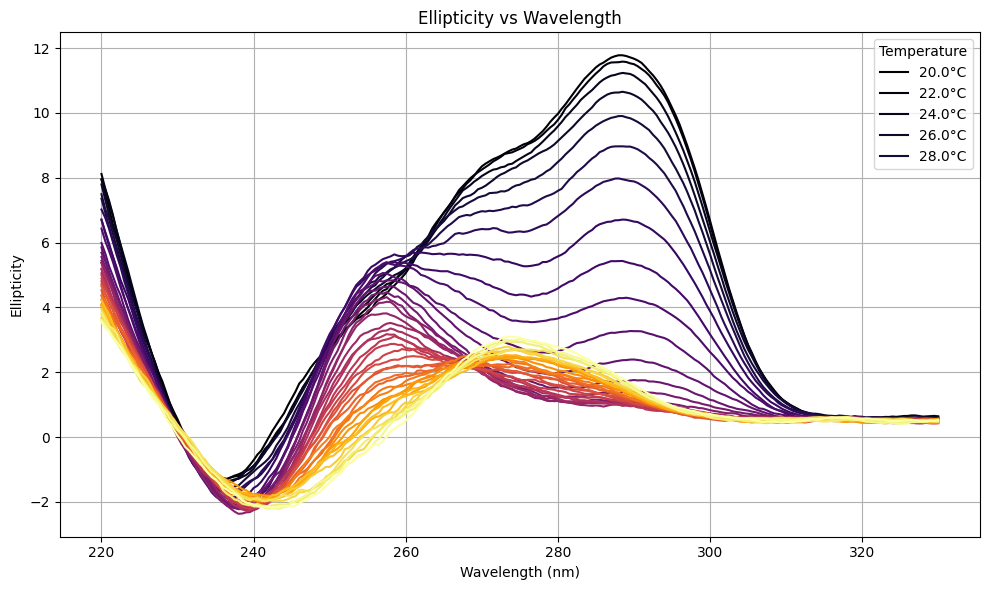

In [24]:
import matplotlib.pyplot as plt

# Pulizia dati
dft_cleaned = dft_cleaned.replace(',', '.', regex=True)
dft_cleaned = dft_cleaned.apply(pd.to_numeric, errors='coerce')

# Estrazione wavelength e spettri
wl = dft_cleaned.iloc[1:, 0].values
spectra = dft_cleaned.iloc[1:, 1:]

# Etichette per le colonne (temperature)
labels = dft_cleaned.iloc[0, 1:spectra.shape[1] + 1].astype(str) + "°C"
spectra.columns = labels
spectra.index = wl

# Plot
ax = spectra.plot(figsize=(10, 6), cmap='inferno')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Ellipticity')
plt.title('Ellipticity vs Wavelength')
plt.grid(True)

# Legenda parziale
handles, legend_labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], legend_labels[:5], title="Temperature", loc='upper right')

plt.tight_layout()
plt.show()



Prima di studiare il numero significativo si dà un'occhiata alle componenti dei vettori base per la loro magnetudine in funzione chiaramente di lambda e poi dei vettori ampiezza in funzione di T.
U*S vanno ad approssimare (se sommati e alcune volte ruotati) la matrice D di partenza mentre V in funzione di T mostra il peso relativo di ciascuna componente ad una determinata T.

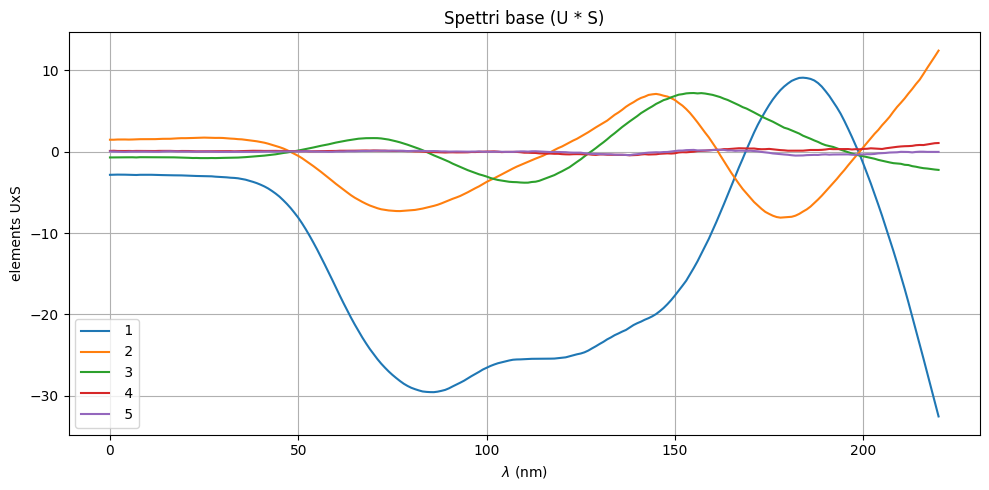

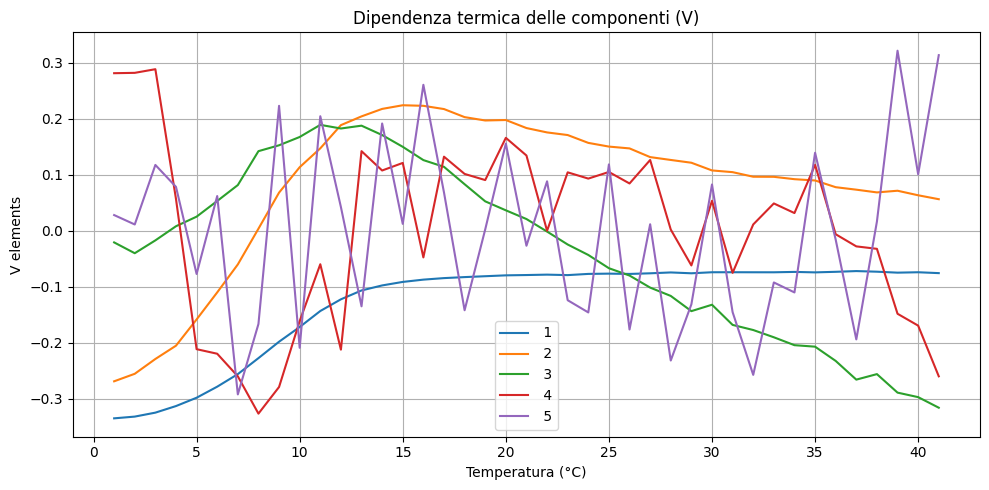

In [9]:
wavelengths = df.index     # l’asse X per gli spettri
temperatures = df.columns # l’asse X per VT

# Plot degli "spettri base" (U * S) in funzione di lambda ti serve x bvedere le componenti che contribuiscono allo spettro tot
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(wavelengths, U[:, i] * S[i], label=f" {i+1}") # Il ciclo for plotta i primi 5 spettri base pesati
plt.xlabel(r"$\lambda$ (nm)")
plt.ylabel("elements UxS")
plt.title("Spettri base (U * S)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot della dipendenza termica (V) in funzione di temperatura ti serve x vedere le componenti che contribuiscono alla dipendenza termica
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(temperatures, VT[i, :], label=f" {i+1}")
plt.xlabel("Temperatura (°C)")
plt.ylabel("V elements")
plt.title("Dipendenza termica delle componenti (V)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Numero significativo di componenti
Ora è importante capire come le diverse componenti di U (i vettori base) contribuiscono alla varianza spiegata.
Vengono plottati quindi gli scree plot (a barre) dei valori singolari e della percentuale di varianza.
Questo ci dà una stima qualitativa del numero di componenti significative grazie all' 'elbow method'.
Si usa una scala logaritmica per evidenziare in maniera migliore i piccoli valori di percentuale di varianza.

Per la varianza spiegata si è usata la seguente formula:

$$ \frac{S^2}{n-1} $$
- con n= numero di osservazioni.

Poi semplicemente viene normalizzata alla varianza spiegata totale per trovare la percentuale.

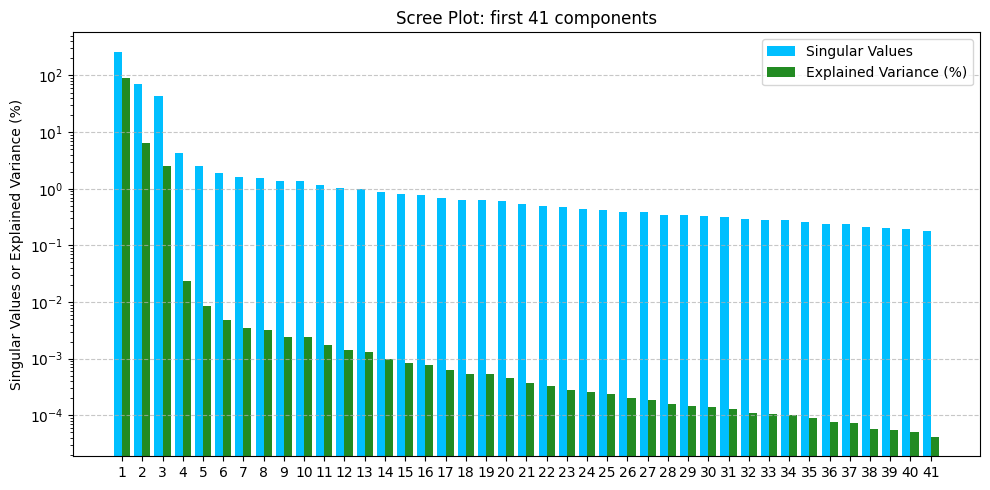

In [10]:
n_samples = D.shape[0]
explained_variance = (S**2) / (n_samples - 1)
explained_variance_ratio = explained_variance / explained_variance.sum() * 100

def plot_scree(S, explained_variance_ratio, num_componenti=10):
    componenti = np.arange(1, num_componenti + 1)

    fig, ax = plt.subplots(figsize=(10, 5))

    width = 0.4
    ax.bar(componenti - width/2, S[:num_componenti], width=width, color='deepskyblue', label='Singular Values')
    ax.bar(componenti + width/2, explained_variance_ratio[:num_componenti], width=width, color='forestgreen', label='Explained Variance (%)')
    ax.set_yscale('log')
    ax.set_ylabel('Singular Values or Explained Variance (%)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(componenti)

    plt.legend(loc='upper right')
    plt.title(f"Scree Plot: first {num_componenti} components")
    plt.tight_layout()
    plt.show()

plot_scree(S, explained_variance_ratio, num_componenti=len(S))


Da qui è chiaro che dalla decima circa componente in poi il contributo è trascurabile.

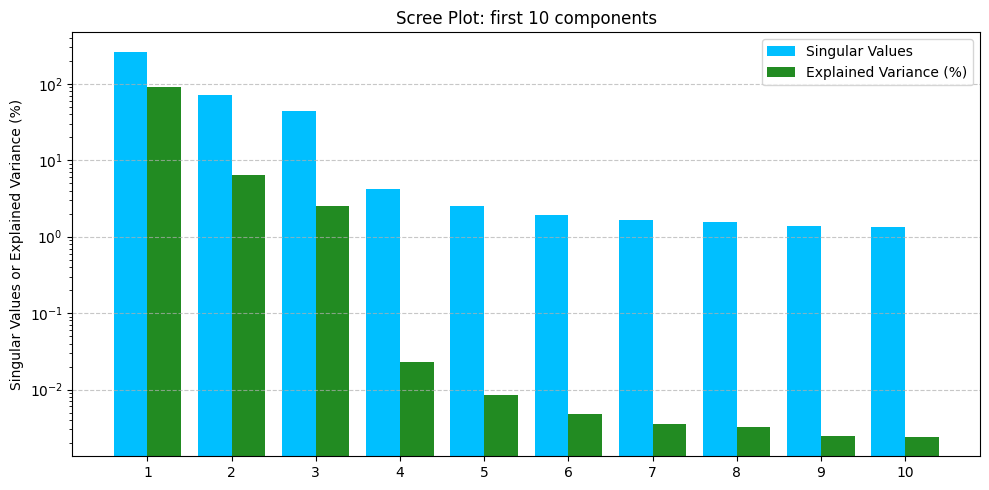

In [11]:
plot_scree(S, explained_variance_ratio, num_componenti=10)

Da questa prima analisi qualitativa è certo che dopo la componente 3, le altre posso essere trascurate.

Ora per essere sicuri della trattazione che stiamo effettuando è necessario andare a confrontare questo risultato con uno studio di autocorrelazione dei valori assunti da U e V al variare del numero di componenti significative.

$$\text{Autocorrelazione} = \frac{\sum_{i=1}^{n-1} (x_i - \bar{x})(x_{i+1} - \bar{x})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

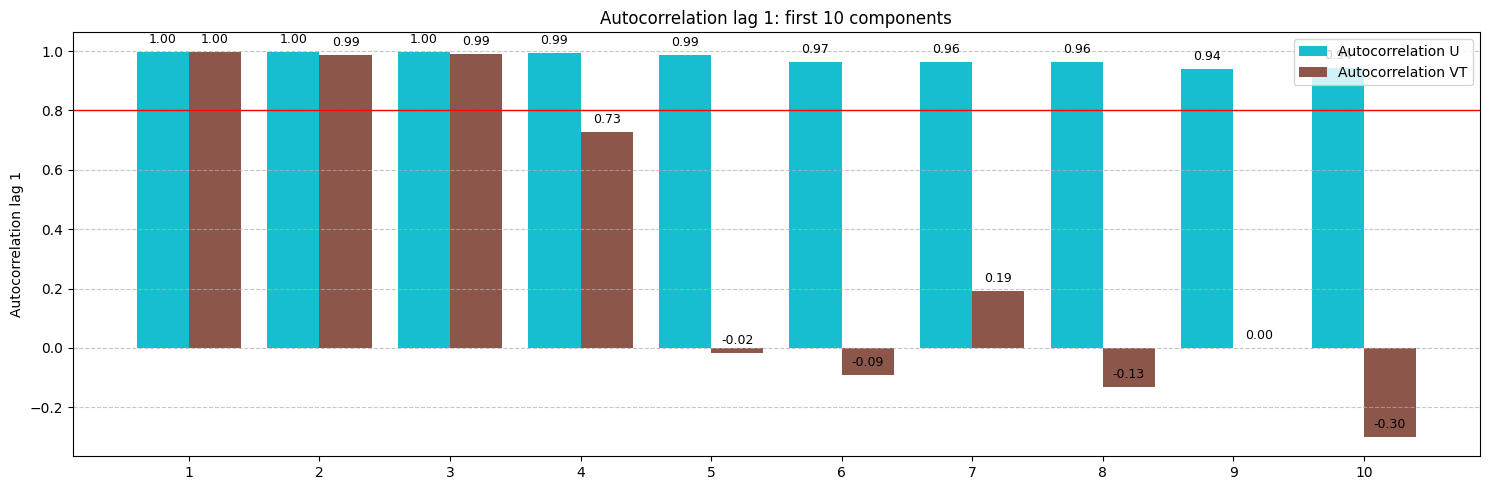

In [12]:
def autocorrelation_lag1(x):
    x = x - np.mean(x)
    return np.corrcoef(x[:-1], x[1:])[0, 1] # Restituisce solo il primo valore della matrice di correlazione

# Calcola autocorrelazione per ciascuna componente
autocorr_valuesVT = [autocorrelation_lag1(VT[i, :]) for i in range(VT.shape[0])] # Calcolo l'autocorrelazione per ogni riga di VT
autocorr_valuesU = [autocorrelation_lag1(U[:, i]) for i in range(U.shape[1])] # Calcolo l'autocorrelazione per ogni colonna di U

def autocorr_plot(autocorr_valuesU, autocorr_valuesVT, num_comp=10):
    comp = np.arange(1, num_comp + 1)
    
    fig, ax = plt.subplots(figsize=(15, 5))

    # Barre affiancate
    width = 0.4
    barsU = ax.bar(comp - width/2, autocorr_valuesU[:num_comp], width=width, color='tab:cyan', label='Autocorrelation U')
    barsVT = ax.bar(comp + width/2, autocorr_valuesVT[:num_comp], width=width, color='tab:brown', label='Autocorrelation VT')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.axhline(0.8, color='red', linestyle='-', linewidth=1)

    # Etichette
    ax.set_ylabel('Autocorrelation lag 1')
    ax.set_xticks(comp)
    ax.set_title(f"Autocorrelation lag 1: first {num_comp} components")

    # Valori sopra le barre
    for bar in barsU:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    for bar in barsVT:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    # Legenda
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

autocorr_plot(autocorr_valuesU, autocorr_valuesVT, num_comp=10)